How to handle outliers
-capping with mean and std

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [76]:
df=pd.read_csv('T:/python/class/class_21/titanic_data.csv')

In [77]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: ylabel='Density'>

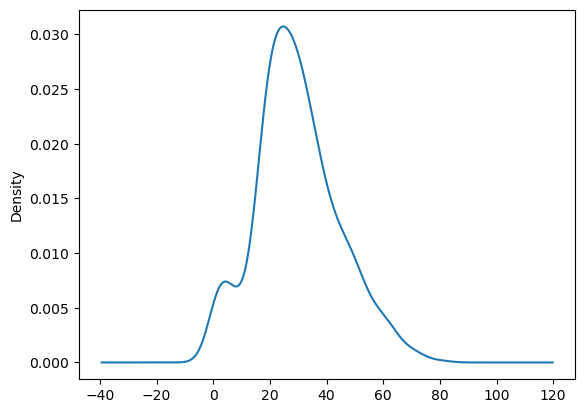

In [78]:
df['Age'].plot(kind='kde')

<Axes: >

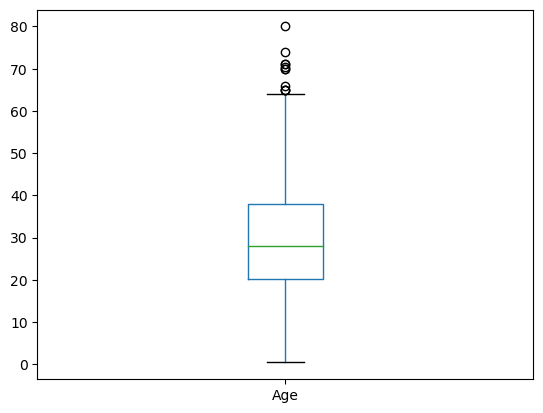

In [79]:
df[['Age']].boxplot(grid=False)

<Axes: >

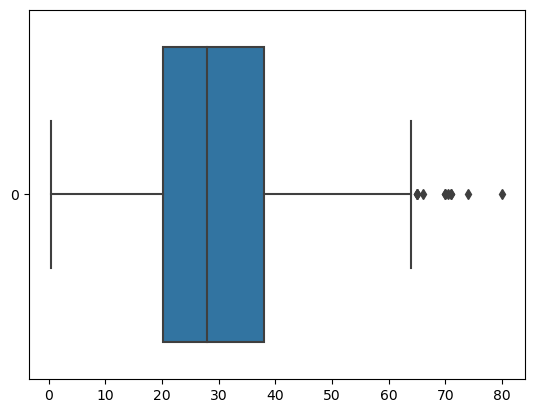

In [80]:
sns.boxplot(df['Age'],orient='h')

# capping with mean and std

In [81]:
def age_cap(df,var,value):
    upper_cap=df[var].mean()+value*df[var].std()
    lower_cap=df[var].mean()-value*df[var].std()
    return upper_cap,lower_cap

In [82]:
upper_cap,lower_cap=age_cap(df,'Age',1.5)

In [60]:
upper_cap,lower_cap=age_cap(df,'Age',3)

In [83]:
upper_cap

51.48886364555989

In [84]:
lower_cap

7.909371648557755

In [85]:
df['Age_Out']=np.where(df['Age']>upper_cap,upper_cap,np.where(df['Age']<lower_cap,lower_cap,df['Age']))

In [86]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Out
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0


<Axes: >

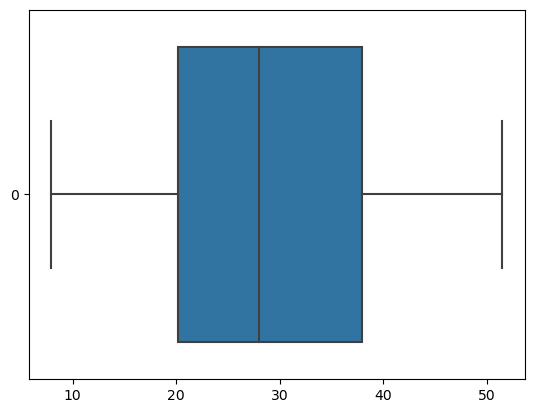

In [87]:
sns.boxplot(df['Age_Out'],orient='h')

# 5th and 95th Quantile

In [88]:
def quantiles(df,var):
    upper=df[var].quantile(0.95)
    lower=df[var].quantile(0.05)
    
    return upper,lower

In [89]:
upper,lower=quantiles(df,'Age')

In [90]:
upper

56.0

In [91]:
lower

4.0

In [92]:
df['age_quant']=np.where(df['Age']>upper,upper,np.where(df['Age']<lower,lower,df['Age']))

<Axes: >

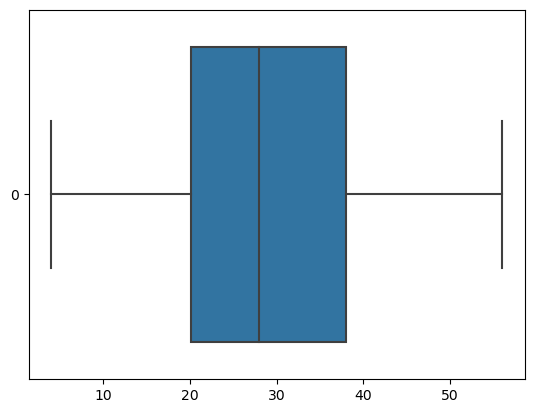

In [93]:
sns.boxplot(df['age_quant'],orient='h')